In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
import seaborn as sns
sns.set
import warnings
warnings.filterwarnings('ignore')

In [75]:
df=pd.read_csv("student_data.csv")

In [76]:
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171.0,1,1,122.0,1,19,12.0,...,0,0.0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254.0,1,1,160.0,1,1,3.0,...,0,6.0,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070.0,1,1,122.0,1,37,37.0,...,0,6.0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773.0,1,1,122.0,1,38,37.0,...,0,6.0,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014.0,0,1,100.0,1,37,38.0,...,0,6.0,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [77]:
df.describe()

,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4423.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4423.000000,4424.000000,...,4424.000000,4424.000000,4423.000000,4424.000000,4424.000000,4423.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,18.669078,1.727848,8856.458738,0.890823,4.577758,132.613314,1.873192,19.561935,22.271987,10.960895,...,0.137658,0.541817,6.231743,8.063291,4.435805,10.229941,0.150316,11.566139,1.228029,0.001969
std,17.484682,1.313793,2063.763479,0.311897,10.216592,13.188332,6.914514,15.603186,15.343244,26.418253,...,0.690880,1.918546,2.196038,3.947951,3.014764,5.211367,0.753774,2.663850,1.382711,2.269935
min,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,4.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,5.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,9.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,194.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [78]:
df.shape

(4424, 37)

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   object 
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4423 non-null   float64
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [80]:
df.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            1
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            1
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   1
Displaced                                         0
Educational special needs                         0
Debtor                                            1
Tuition fees up to date                           1
Gender                                            0
Scholarship holder                                0
Age at enrol

In [81]:
df["Marital status"].unique()

array(['1', '2', '4', '?', '3', '5', '6'], dtype=object)

In [82]:
df["Course"].unique()

array([ 171., 9254., 9070., 9773., 8014., 9991., 9500., 9238., 9670.,
       9853., 9085., 9130., 9556., 9147., 9003.,   33., 9119.,   nan])

In [83]:
df["Father's qualification"].unique()

array([12.,  3., 37., 38.,  1., 19.,  5.,  4., 34.,  2., 39., 11.,  9.,
       nan, 36., 26., 40., 14., 20., 35., 41., 22., 13., 29., 43., 18.,
       42., 10.,  6., 30., 25., 44., 33., 27., 31.])

In [84]:
df["Marital status"].unique()

array(['1', '2', '4', '?', '3', '5', '6'], dtype=object)

In [85]:
df["Debtor"].unique()

array([ 0.,  1., nan])

In [86]:
missing_value_formats = ["n.a.","?","NA","n/a","na","--","nan","UnKnown","Na"]

In [87]:
df = pd.read_csv("student_data.csv",na_values=missing_value_formats)

In [88]:
df.isnull().values.any()

True

In [89]:
df["Target"].unique()

array(['Dropout', 'Graduate', 'Enrolled', 'Grad', 'graduate', 'Drop',
       'dropout'], dtype=object)

In [90]:
df["Target"]=df["Target"].replace({"Drop":"Dropout","Grad":"Graduate","graduate":"Graduate","dropout":"Dropout",})

In [91]:
df["Target"].unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

In [92]:
df["Target"]=df["Target"].replace({"Dropout":"1","Graduate":"2","Enrolled":"3"})

In [93]:
df["Target"].unique()

array(['1', '2', '3'], dtype=object)

In [94]:
df["Course"].unique()

array([ 171., 9254., 9070., 9773., 8014., 9991., 9500., 9238., 9670.,
       9853., 9085., 9130., 9556., 9147., 9003.,   33., 9119.,   nan])

In [95]:
df.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4423.000000,4424.000000,4424.000000,4423.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4423.000000,...,4424.000000,4424.000000,4423.000000,4424.000000,4424.000000,4423.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178612,18.669078,1.727848,8856.458738,0.890823,4.577758,132.613314,1.873192,19.561935,22.271987,...,0.137658,0.541817,6.231743,8.063291,4.435805,10.229941,0.150316,11.566139,1.228029,0.001969
std,0.605809,17.484682,1.313793,2063.763479,0.311897,10.216592,13.188332,6.914514,15.603186,15.343244,...,0.690880,1.918546,2.196038,3.947951,3.014764,5.211367,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [96]:
student_no_label = df.dropna(axis=0)

In [97]:
student_no_label["Course"].unique()

array([ 171., 9254., 9070., 9773., 8014., 9991., 9500., 9238., 9670.,
       9853., 9085., 9130., 9556., 9147., 9003.,   33., 9119.])

In [98]:
student_no_label.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4411.000000,4411.000000,4411.000000,4411.000000,4411.000000,4411.000000,4411.000000,4411.000000,4411.000000,4411.000000,...,4411.000000,4411.000000,4411.000000,4411.000000,4411.000000,4411.000000,4411.000000,4411.000000,4411.000000,4411.000000
mean,1.178644,18.671276,1.728406,8861.600091,0.890954,4.585355,132.628202,1.866697,19.566992,22.268647,...,0.137837,0.540920,6.233280,8.062798,4.437089,10.233772,0.150079,11.569848,1.230855,0.005933
std,0.606321,17.470528,1.313857,2053.895552,0.311732,10.228951,13.191683,6.899433,15.601303,15.339888,...,0.691739,1.919193,2.192905,3.944444,3.013473,5.210856,0.754525,2.663520,1.381920,2.267564
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.800000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,53.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [99]:
student_no_label["Course"].unique()

array([ 171., 9254., 9070., 9773., 8014., 9991., 9500., 9238., 9670.,
       9853., 9085., 9130., 9556., 9147., 9003.,   33., 9119.])

In [100]:
df.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4423.000000,4424.000000,4424.000000,4423.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4423.000000,...,4424.000000,4424.000000,4423.000000,4424.000000,4424.000000,4423.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178612,18.669078,1.727848,8856.458738,0.890823,4.577758,132.613314,1.873192,19.561935,22.271987,...,0.137658,0.541817,6.231743,8.063291,4.435805,10.229941,0.150316,11.566139,1.228029,0.001969
std,0.605809,17.484682,1.313793,2063.763479,0.311897,10.216592,13.188332,6.914514,15.603186,15.343244,...,0.690880,1.918546,2.196038,3.947951,3.014764,5.211367,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [101]:
student_no_label.isnull().values.any()

False

In [102]:
student_no_label.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [103]:
student_no_label["Marital status"]=student_no_label["Marital status"].astype(int)

In [104]:
student_no_label["Course"]=student_no_label["Course"].astype(int)

In [105]:
student_no_label["Father's qualification"]=student_no_label["Father's qualification"].astype(int)

In [106]:
student_no_label["Displaced"]=student_no_label["Displaced"].astype(int)

In [107]:
student_no_label["Debtor"]=student_no_label["Debtor"].astype(int)

In [108]:
student_no_label["Tuition fees up to date"]=student_no_label["Tuition fees up to date"].astype(int)

In [109]:
student_no_label["Age at enrollment"]=student_no_label["Age at enrollment"].astype(int)

In [110]:
student_no_label["Curricular units 2nd sem (enrolled)"]=student_no_label["Curricular units 2nd sem (enrolled)"].astype(int)

In [111]:
student_no_label["Curricular units 1st sem (credited)"]=student_no_label["Curricular units 1st sem (credited)"].astype(int)

In [112]:
student_no_label["Curricular units 1st sem (grade)"]=student_no_label["Curricular units 1st sem (grade)"].astype(int)

In [113]:
student_no_label["Curricular units 1st sem (credited)"]=student_no_label["Curricular units 1st sem (credited)"].astype(int)

In [114]:
student_no_label["Curricular units 2nd sem (grade)"]=student_no_label["Curricular units 2nd sem (grade)"].astype(int)

In [115]:
student_no_label.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0,0,10.8,1.4,1.74,1
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13,0,13.9,-0.3,0.79,2
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0,0,10.8,1.4,1.74,1
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12,0,9.4,-0.8,-3.12,2
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13,0,13.9,-0.3,0.79,2


In [116]:
student_no_label = student_no_label.drop(columns=["Target"])

In [117]:
student_no_label.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0,0,0,10.8,1.4,1.74
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,0,6,6,6,13,0,13.9,-0.3,0.79
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,0,6,0,0,0,0,10.8,1.4,1.74
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,0,6,10,5,12,0,9.4,-0.8,-3.12
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,0,6,6,6,13,0,13.9,-0.3,0.79


In [118]:
pca = PCA().fit(student_no_label)

In [119]:
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [120]:
pca = PCA().fit(student_no_label)

Text(0, 0.5, 'cumulative explained variance')

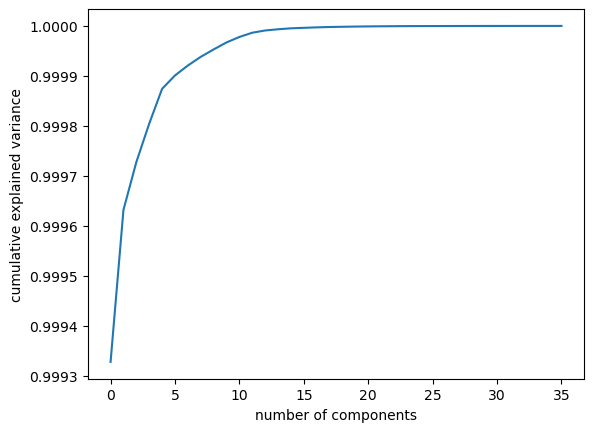

In [121]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("number of components")
plt.ylabel("cumulative explained variance")

In [144]:
pca.components_

array([[-1.35542099e-05, -5.35205198e-04, -3.87611071e-05,
        -9.99997720e-01,  6.45955185e-06, -2.97302885e-05,
         5.20623348e-04,  1.18538285e-04, -4.01969543e-04,
        -3.58395982e-04, -3.98561556e-04, -3.49997259e-04,
         8.72530134e-04,  2.07291905e-05,  9.98019183e-07,
         4.76336924e-06, -2.55196948e-06,  2.28459872e-05,
        -3.26637353e-06, -1.55240395e-04,  2.13282690e-06,
         1.09760877e-04, -3.96349625e-04, -5.53507799e-04,
        -2.72396246e-04, -8.86352230e-04, -1.15020996e-05,
         8.35199574e-05, -4.28856414e-04, -5.37186119e-04,
        -2.90421171e-04, -8.52894170e-04, -1.16976003e-05,
        -6.40044775e-06, -1.03666268e-05,  2.36491314e-05],
       [ 7.46043975e-04,  3.16900715e-02, -1.62636573e-03,
        -5.86770741e-04, -2.52063687e-04,  6.33730479e-03,
        -8.46392608e-03,  6.36187584e-03,  4.10809728e-02,
         3.69371443e-02,  7.22638708e-01,  6.87610182e-01,
        -1.90980427e-02, -7.87415063e-04,  1.11791673e-

In [145]:
pca.explained_variance_

array([4.21850617e+06, 1.28333047e+03, 4.03258473e+02, 3.24781493e+02,
       2.93633362e+02, 1.12750184e+02, 8.38869576e+01, 7.33476205e+01,
       6.24591540e+01, 5.90677559e+01, 4.61905502e+01, 3.58237616e+01,
       1.89174096e+01, 1.00860460e+01, 8.07824623e+00])

In [152]:
pca =PCA(15)
projected = pca.fit_transform(student_no_label)

In [153]:
projected.shape

(4411, 15)

In [154]:
projected

array([[ 8.69061749e+03, -9.23188780e-01, -1.13660258e+00, ...,
        -2.13815151e+00,  5.52223786e-01, -9.46648674e-01],
       [-3.92352406e+02, -1.37917405e+01,  2.89276012e+01, ...,
        -3.64601592e+00,  1.29700447e+00,  1.34560443e+00],
       [-2.08378420e+02, -2.07604930e+00, -8.65635545e+00, ...,
         4.85576545e+00,  6.39587362e+00, -8.23137557e-01],
       ...,
       [-6.38377045e+02, -3.09603076e+00, -3.83281967e+00, ...,
        -1.63479861e+00, -2.30059281e+00,  1.19473121e+00],
       [-2.85350047e+02, -8.21207152e+00,  1.12251131e+00, ...,
        -1.96642638e+00,  6.48976566e-02, -3.90908115e-01],
       [-9.11370918e+02, -5.83641532e+00, -6.95644678e+00, ...,
        -3.65172597e-02,  9.23859293e-01,  2.37635284e+00]])

In [155]:
student_pca =pd.DataFrame(projected,columns= ["A1","A2","A3","A4","A5","A6","A7","A8","A9","A10","A11","A12","A13","A14","A15"])

In [156]:
student_pca.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
0,8690.617494,-0.923189,-1.136603,-6.160233,-15.214754,6.808269,3.600032,5.071048,-6.702495,-2.490384,-1.233416,-5.359722,-2.138152,0.552224,-0.946649
1,-392.352406,-13.791741,28.927601,22.586808,15.349864,1.448538,-12.142230,-1.219104,1.927029,-1.960697,-2.964929,-0.204022,-3.646016,1.297004,1.345604
2,-208.378420,-2.076049,-8.656355,-27.827064,8.424577,2.549375,4.880618,3.208274,-18.049965,3.483406,0.584055,-3.789957,4.855765,6.395874,-0.823138
3,-911.421417,-9.026735,-18.171604,-18.944988,1.343119,2.039234,3.119871,0.432697,2.760868,0.808135,-0.039238,-5.881930,-0.862754,-0.937376,0.049747
4,847.564589,-0.151105,-36.371099,-0.434891,-7.473168,3.687209,22.378888,27.978566,3.591460,1.907044,0.602155,7.171073,-7.897652,-0.615790,2.333461


In [157]:
student_pca["Target"]=df["Target"]

In [158]:
df["Target"].unique()

array(['1', '2', '3'], dtype=object)

In [159]:
student_pca.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,Target
0,8690.617494,-0.923189,-1.136603,-6.160233,-15.214754,6.808269,3.600032,5.071048,-6.702495,-2.490384,-1.233416,-5.359722,-2.138152,0.552224,-0.946649,1
1,-392.352406,-13.791741,28.927601,22.586808,15.349864,1.448538,-12.142230,-1.219104,1.927029,-1.960697,-2.964929,-0.204022,-3.646016,1.297004,1.345604,2
2,-208.378420,-2.076049,-8.656355,-27.827064,8.424577,2.549375,4.880618,3.208274,-18.049965,3.483406,0.584055,-3.789957,4.855765,6.395874,-0.823138,1
3,-911.421417,-9.026735,-18.171604,-18.944988,1.343119,2.039234,3.119871,0.432697,2.760868,0.808135,-0.039238,-5.881930,-0.862754,-0.937376,0.049747,2
4,847.564589,-0.151105,-36.371099,-0.434891,-7.473168,3.687209,22.378888,27.978566,3.591460,1.907044,0.602155,7.171073,-7.897652,-0.615790,2.333461,2


In [160]:
student_pca.describe()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
count,4.411000e+03,4.411000e+03,4.411000e+03,4.411000e+03,4.411000e+03,4.411000e+03,4.411000e+03,4.411000e+03,4.411000e+03,4.411000e+03,4.411000e+03,4.411000e+03,4.411000e+03,4.411000e+03,4.411000e+03
mean,-2.325799e-13,1.288674e-16,-5.567073e-15,-5.103150e-15,-6.546465e-15,-1.778370e-15,-1.074754e-14,-9.948565e-15,8.150864e-16,-3.157252e-15,1.320891e-16,4.381492e-16,-4.381492e-16,1.030939e-16,2.867300e-16
std,2.053900e+03,3.582360e+01,2.008130e+01,1.802170e+01,1.713573e+01,1.061839e+01,9.158982e+00,8.564323e+00,7.903110e+00,7.685555e+00,6.796363e+00,5.985295e+00,4.349415e+00,3.175854e+00,2.842226e+00
min,-1.129569e+03,-1.858185e+01,-4.904186e+01,-4.769476e+01,-5.880110e+01,-3.034069e+01,-4.210811e+01,-3.690463e+01,-2.846514e+01,-6.854702e+01,-1.460900e+01,-1.608229e+01,-1.494742e+01,-1.398164e+01,-5.909806e+00
25%,-6.944082e+02,-9.989117e+00,-1.436463e+01,-1.288740e+01,-1.134029e+01,-5.071364e+00,-4.716157e+00,-3.705877e+00,-2.490288e+00,-1.967043e+00,-1.556273e+00,-3.593348e+00,-2.527606e+00,-1.775252e+00,-1.910764e+00
50%,-3.764259e+02,-6.655239e+00,1.060500e+00,-2.156289e+00,-3.628556e-01,1.694850e+00,6.316982e-02,6.594561e-02,9.991359e-01,-6.992736e-02,-7.170481e-01,-8.357720e-01,-7.247406e-01,2.460696e-01,-4.087558e-01
75%,-2.234092e+02,-3.361141e+00,1.506253e+01,1.036169e+01,1.103180e+01,3.315440e+00,4.727048e+00,4.139037e+00,3.449534e+00,1.709935e+00,3.883684e-02,2.257069e+00,1.768289e+00,1.637067e+00,1.851498e+00
max,8.828606e+03,2.595901e+02,5.435540e+01,7.623592e+01,6.440257e+01,3.381742e+01,4.687491e+01,4.376029e+01,4.633086e+01,1.270816e+02,1.042122e+02,3.724617e+01,2.904717e+01,1.680672e+01,7.849806e+00


In [161]:
student_pca["Target"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 4411 entries, 0 to 4410
Series name: Target
Non-Null Count  Dtype 
--------------  ----- 
4411 non-null   object
dtypes: object(1)
memory usage: 34.6+ KB


In [162]:
student_pca["Target"].describe()

count     4411
unique       3
top          2
freq      2202
Name: Target, dtype: object

In [163]:
student_pca.describe()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
count,4.411000e+03,4.411000e+03,4.411000e+03,4.411000e+03,4.411000e+03,4.411000e+03,4.411000e+03,4.411000e+03,4.411000e+03,4.411000e+03,4.411000e+03,4.411000e+03,4.411000e+03,4.411000e+03,4.411000e+03
mean,-2.325799e-13,1.288674e-16,-5.567073e-15,-5.103150e-15,-6.546465e-15,-1.778370e-15,-1.074754e-14,-9.948565e-15,8.150864e-16,-3.157252e-15,1.320891e-16,4.381492e-16,-4.381492e-16,1.030939e-16,2.867300e-16
std,2.053900e+03,3.582360e+01,2.008130e+01,1.802170e+01,1.713573e+01,1.061839e+01,9.158982e+00,8.564323e+00,7.903110e+00,7.685555e+00,6.796363e+00,5.985295e+00,4.349415e+00,3.175854e+00,2.842226e+00
min,-1.129569e+03,-1.858185e+01,-4.904186e+01,-4.769476e+01,-5.880110e+01,-3.034069e+01,-4.210811e+01,-3.690463e+01,-2.846514e+01,-6.854702e+01,-1.460900e+01,-1.608229e+01,-1.494742e+01,-1.398164e+01,-5.909806e+00
25%,-6.944082e+02,-9.989117e+00,-1.436463e+01,-1.288740e+01,-1.134029e+01,-5.071364e+00,-4.716157e+00,-3.705877e+00,-2.490288e+00,-1.967043e+00,-1.556273e+00,-3.593348e+00,-2.527606e+00,-1.775252e+00,-1.910764e+00
50%,-3.764259e+02,-6.655239e+00,1.060500e+00,-2.156289e+00,-3.628556e-01,1.694850e+00,6.316982e-02,6.594561e-02,9.991359e-01,-6.992736e-02,-7.170481e-01,-8.357720e-01,-7.247406e-01,2.460696e-01,-4.087558e-01
75%,-2.234092e+02,-3.361141e+00,1.506253e+01,1.036169e+01,1.103180e+01,3.315440e+00,4.727048e+00,4.139037e+00,3.449534e+00,1.709935e+00,3.883684e-02,2.257069e+00,1.768289e+00,1.637067e+00,1.851498e+00
max,8.828606e+03,2.595901e+02,5.435540e+01,7.623592e+01,6.440257e+01,3.381742e+01,4.687491e+01,4.376029e+01,4.633086e+01,1.270816e+02,1.042122e+02,3.724617e+01,2.904717e+01,1.680672e+01,7.849806e+00


In [164]:
student_pca.shape

(4411, 16)

In [165]:
student_pca.isnull().sum()

A1        0
A2        0
A3        0
A4        0
A5        0
A6        0
A7        0
A8        0
A9        0
A10       0
A11       0
A12       0
A13       0
A14       0
A15       0
Target    0
dtype: int64

In [166]:
student_array = student_pca.values

In [167]:
student_array

array([[8690.617493601681, -0.9231887798872043, -1.1366025838165335, ...,
        0.5522237864804996, -0.9466486743708944, '1'],
       [-392.35240551757505, -13.79174052442839, 28.927601153177985, ...,
        1.2970044749135294, 1.3456044329313788, '2'],
       [-208.3784200442143, -2.0760492978489173, -8.656355453520183, ...,
        6.3958736169411425, -0.8231375572598338, '1'],
       ...,
       [-638.3770448123412, -3.0960307591264145, -3.8328196677893964,
        ..., -2.300592805380799, 1.194731214023742, '1'],
       [-285.35004674014704, -8.21207152426774, 1.1225113136042562, ...,
        0.0648976565693945, -0.39090811543220194, '2'],
       [-911.3709180118966, -5.836415315262862, -6.956446780253247, ...,
        0.9238592925125201, 2.3763528361772868, '2']], dtype=object)

In [188]:
from sklearn.model_selection import train_test_split
X = student_array[:,0:15]
y = student_array[:,15]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=30, random_state=1)

In [189]:
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [190]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

In [193]:
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.500798 (0.010830)
LDA: 0.501255 (0.010787)
KNN: 0.438489 (0.020723)
CART: 0.385525 (0.012657)
NB: 0.471576 (0.014819)
SVM: 0.500571 (0.004248)


In [194]:
model = LogisticRegression(solver='liblinear', multi_class='ovr')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

In [195]:
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))

0.3333333333333333
[[ 1 11  0]
 [ 1  9  0]
 [ 0  8  0]]
